In [ ]:
#Name:Benson Karanja 
#Project:A Weather Forecast model.
#Type:A DecisionTreeClassifier Model
#Date:17TH NOV 2024.

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('weather_forecast_data.csv')
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [7]:
df.shape

(2500, 6)

In [8]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [11]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [16]:
inputs=df.drop(['Rain'],axis='columns')
Target=df.Rain

0          rain
1       no rain
2       no rain
3          rain
4       no rain
         ...   
2495    no rain
2496    no rain
2497    no rain
2498    no rain
2499    no rain
Name: Rain, Length: 2500, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
Target1=le.fit_transform(Target)
Target1

array([1, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,Target1,test_size=0.3)

In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.928000,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.996571,{'n_estimators': 5}
2,logistic_regression,0.931429,{'C': 1}
3,naive_bayes_gaussian,0.961714,{}
4,naive_bayes_multinomial,0.808571,{}
5,decision_tree,0.998857,{'criterion': 'gini'}


In [27]:
model=DecisionTreeClassifier( criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
model.score(x_test,y_test)

0.9986666666666667

In [29]:
model.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], shape=(750, 2))

In [32]:
y_pred= model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[647,   0],
       [  1, 102]])

Text(58.222222222222214, 0.5, 'Truth')

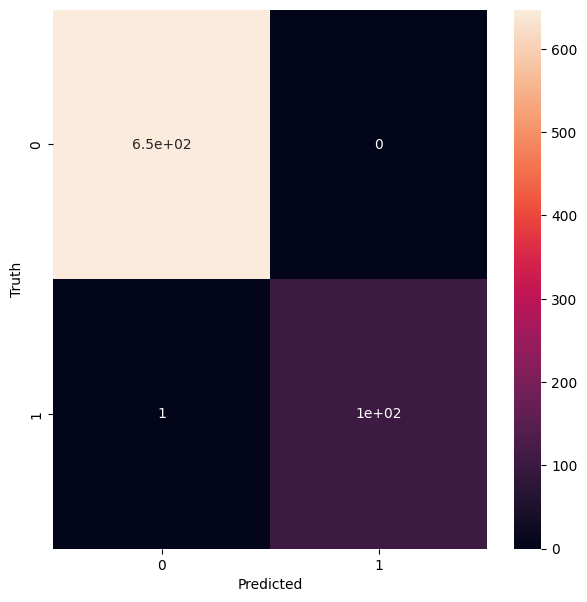

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
import joblib
joblib.dump(model, 'weather_forecast_pred_joblib')

['weather_forecast_pred_joblib']